In [312]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
import pandas as pd
import numpy as np

loading dataset 

In [313]:
df = pd.read_csv('preprocessed_df.csv')
df 

,Unnamed: 0,brand_alcatel,brand_apple,brand_asus,brand_blu,brand_htc,brand_huawei,brand_infinix,brand_lenovo,brand_lg,...,CPU,ratio,pixel,Loudspeaker,3.5mm jack,RAM,Storage,Color_count,Sensors_count,Bluetooth_version
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.000000,1036800.0,1,1,2.000,32.0,2,1,5.0
1,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,0.555556,1123200.0,1,1,2.000,32.0,2,3,4.2
2,2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4.0,2.000000,460800.0,1,1,1.000,8.0,2,2,4.2
3,3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.222222,1152000.0,1,1,4.000,64.0,2,4,5.0
4,4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,8.0,2.222222,1152000.0,1,1,3.000,32.0,2,4,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2646,2646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.666667,96000.0,1,1,0.250,0.5,2,3,3.0
2647,2647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.666667,96000.0,1,1,0.250,0.5,2,3,3.0
2648,2648,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.666667,384000.0,1,1,0.375,1.0,2,3,2.1
2649,2649,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,2.0,1.666667,384000.0,1,1,0.500,8.0,2,3,3.0


In [314]:
df.drop('Unnamed: 0' , inplace=True , axis = 1)

In [315]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2651 entries, 0 to 2650
Data columns (total 48 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   brand_alcatel        2651 non-null   float64
 1   brand_apple          2651 non-null   float64
 2   brand_asus           2651 non-null   float64
 3   brand_blu            2651 non-null   float64
 4   brand_htc            2651 non-null   float64
 5   brand_huawei         2651 non-null   float64
 6   brand_infinix        2651 non-null   float64
 7   brand_lenovo         2651 non-null   float64
 8   brand_lg             2651 non-null   float64
 9   brand_nokia          2651 non-null   float64
 10  brand_samsung        2651 non-null   float64
 11  brand_sony           2651 non-null   float64
 12  brand_xiaomi         2651 non-null   float64
 13  brand_zte            2651 non-null   float64
 14  Status_Available     2651 non-null   float64
 15  Status_Coming        2651 non-null   f

In [316]:
df['OS'] = 0 * df['OS_Category_android'] +  df['OS_Category_ios'] + 2*df['OS_Category_other']

In [317]:
df['OS'].unique()

array([0., 2., 1.])

In [318]:
data = df.drop(columns=['OS_Category_android' , 'OS_Category_ios' , 'OS_Category_other'])

scaler = StandardScaler()

Xdata = data.drop('OS' , axis = 1)
Xdata = pd.DataFrame(scaler.fit_transform(Xdata) , columns=Xdata.columns)
ydata = data['OS']

data = pd.concat([Xdata , ydata] , axis=1)

In [319]:
df_train , df_test = train_test_split(data, test_size=0.15, random_state=42)

In [322]:
df_train['OS'].value_counts()

OS
0.0    2076
2.0     120
1.0      57
Name: count, dtype: int64

In [323]:
X = df_train.drop('OS' , axis=1)
y = df_train['OS']

In [324]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Under Sampling with imbalanced-learn

In [325]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
rusX , rusy  = rus.fit_resample(X_train , y_train )
df_train_RandomUnderSampler = pd.concat([rusX , rusy] , axis = 1)

In [326]:
df_train_RandomUnderSampler['OS'].value_counts()

OS
0.0    47
1.0    47
2.0    47
Name: count, dtype: int64

Random Over Sampling with imbalanced-learn

In [327]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
rosX , rosy = ros.fit_resample(X_train , y_train )
df_train_RandomOverSampler = pd.concat([rosX , rosy] , axis = 1)

In [328]:
df_train_RandomOverSampler['OS'].value_counts()

OS
0.0    1652
2.0    1652
1.0    1652
Name: count, dtype: int64

Under Sampling using Cluster Centroids

In [329]:
from imblearn.under_sampling import ClusterCentroids
cc = ClusterCentroids(random_state = 42)
X_cc, y_cc = cc.fit_resample(X_train , y_train )
df_train_ClusterCentroids = pd.concat([X_cc , y_cc] , axis=1)

/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Applications/anaconda3/envs/quera/lib/python3.9/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [330]:
df_train_ClusterCentroids['OS'].value_counts()

OS
0.0    47
1.0    47
2.0    47
Name: count, dtype: int64

Over Sampling using SMOTE

In [331]:
from imblearn.over_sampling import SMOTE 
smote = SMOTE(random_state=42)
smX, smy = smote.fit_resample(X_train , y_train )
df_train_SMOTE = pd.concat([smX , smy] , axis=1)

In [332]:
df_train_SMOTE['OS'].value_counts()

OS
0.0    1652
2.0    1652
1.0    1652
Name: count, dtype: int64

Over/Under Sampling using SMOTEENN

In [333]:
from imblearn.combine import SMOTEENN
smote_enn = SMOTEENN(random_state=42)
smX, smy = smote_enn.fit_resample(X_train , y_train )
df_train_SMOTEENN = pd.concat([smX , smy] , axis=1)

In [334]:
df_train_SMOTEENN['OS'].value_counts()

OS
1.0    1652
2.0    1644
0.0    1553
Name: count, dtype: int64

TESTING EACH DATASET WITH RANDOMFOREST , XGBOOST , CATBOOST

In [335]:
from xgboost import XGBClassifier 
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report , roc_auc_score , roc_curve , confusion_matrix
import matplotlib.pyplot as plt 
import seaborn as sns 

In [336]:
def prediction_report(modelName , dataset) :
    
    XX = dataset.drop('OS' , axis=1)
    yy = dataset['OS']

    if modelName == 'rf' :
        model = RandomForestClassifier(n_estimators=200)
    if modelName == 'xgb' :
        model = XGBClassifier()
    if modelName == 'cat' :
        model = CatBoostClassifier()

    
    model.fit(XX , yy)

    true_labels = y_test
    predicted_probabilities = model.predict_proba(X_test)

    report = classification_report(true_labels, np.argmax(predicted_probabilities, axis=1))
    print("Classification Report:\n", report)

    # Compute ROC AUC score
    roc_auc = roc_auc_score(true_labels, predicted_probabilities, multi_class='ovr')  # One-vs-Rest strategy
    print("ROC AUC Score:", roc_auc)

    # Plot ROC curves
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(3):
        fpr[i], tpr[i], _ = roc_curve((true_labels == i).astype(int), predicted_probabilities[:, i])
        roc_auc[i] = roc_auc_score((true_labels == i).astype(int), predicted_probabilities[:, i])

    plt.figure()
    plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label=f'Class 0 (AUC = {roc_auc[0]:.2f})')
    plt.plot(fpr[1], tpr[1], color='green', lw=2, label=f'Class 1 (AUC = {roc_auc[1]:.2f})')
    plt.plot(fpr[2], tpr[2], color='blue', lw=2, label=f'Class 2 (AUC = {roc_auc[2]:.2f})')
    plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve for Multi-class Classification')
    plt.legend(loc="lower right")
    plt.show()

    sns.heatmap(confusion_matrix(true_labels , np.argmax(predicted_probabilities, axis=1)) , annot=True , cmap='YlGnBu')
    plt.show()


RandomForest
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       424
         1.0       1.00      1.00      1.00        10
         2.0       0.20      0.59      0.29        17

    accuracy                           0.89       451
   macro avg       0.73      0.83      0.75       451
weighted avg       0.95      0.89      0.92       451

ROC AUC Score: 0.9368879277776799


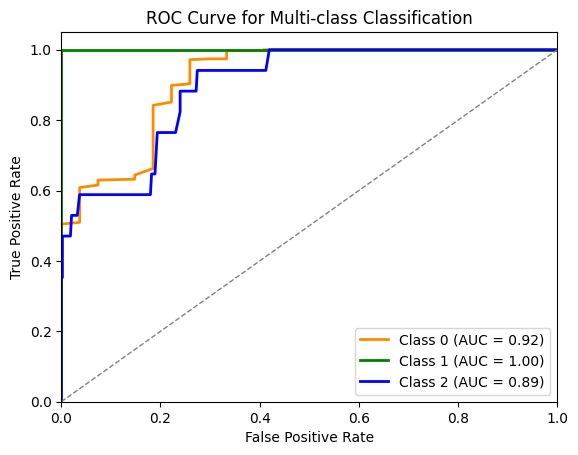

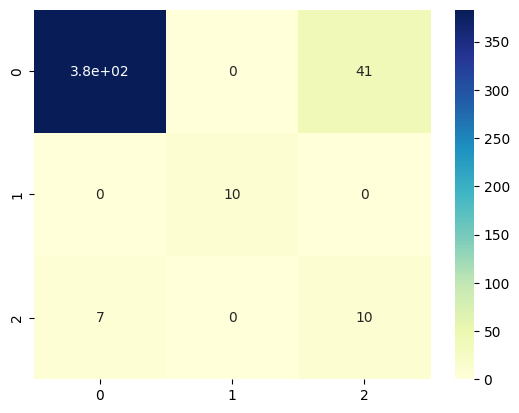

XGBoost
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      0.90      0.94       424
         1.0       1.00      1.00      1.00        10
         2.0       0.19      0.59      0.29        17

    accuracy                           0.89       451
   macro avg       0.72      0.83      0.74       451
weighted avg       0.95      0.89      0.92       451

ROC AUC Score: 0.9148581582719877


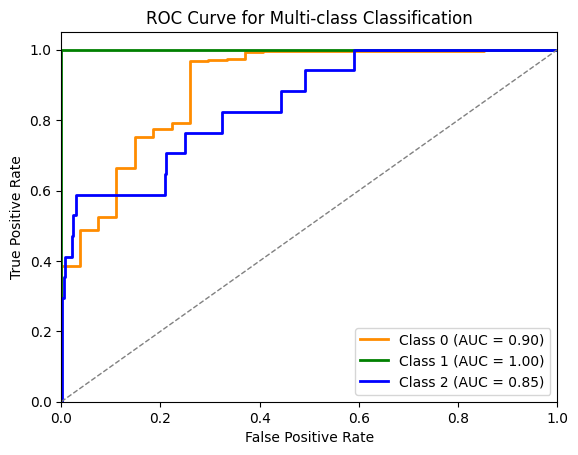

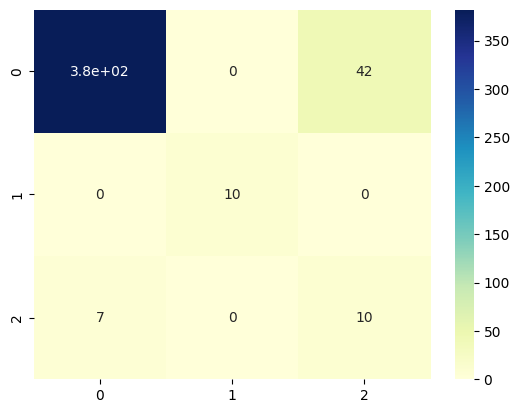

CATBoost
Learning rate set to 0.071603
0:	learn: 1.0474375	total: 1.73ms	remaining: 1.72s
1:	learn: 0.9999723	total: 3.19ms	remaining: 1.59s
2:	learn: 0.9503201	total: 4.41ms	remaining: 1.47s
3:	learn: 0.9048834	total: 5.47ms	remaining: 1.36s
4:	learn: 0.8651284	total: 6.61ms	remaining: 1.31s
5:	learn: 0.8240249	total: 7.89ms	remaining: 1.31s
6:	learn: 0.7931211	total: 9.22ms	remaining: 1.31s
7:	learn: 0.7637682	total: 10.3ms	remaining: 1.28s
8:	learn: 0.7370616	total: 11.6ms	remaining: 1.27s
9:	learn: 0.7099357	total: 12.8ms	remaining: 1.27s
10:	learn: 0.6891017	total: 13.9ms	remaining: 1.25s
11:	learn: 0.6607070	total: 15ms	remaining: 1.24s
12:	learn: 0.6427897	total: 16.3ms	remaining: 1.24s
13:	learn: 0.6291250	total: 17.4ms	remaining: 1.22s
14:	learn: 0.6134652	total: 18.5ms	remaining: 1.22s
15:	learn: 0.5951047	total: 19.6ms	remaining: 1.21s
16:	learn: 0.5796158	total: 20.6ms	remaining: 1.19s
17:	learn: 0.5650949	total: 21.7ms	remaining: 1.18s
18:	learn: 0.5481852	total: 23ms	rema

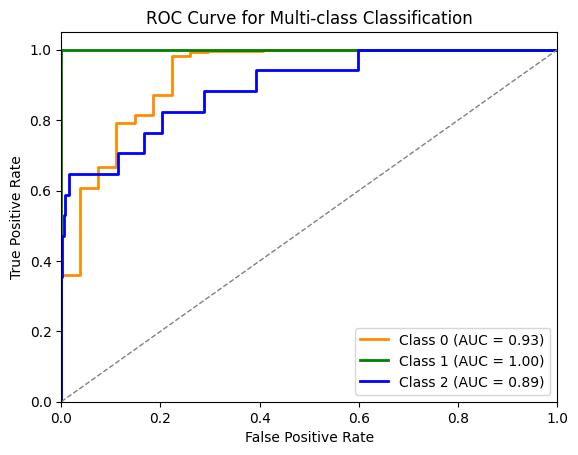

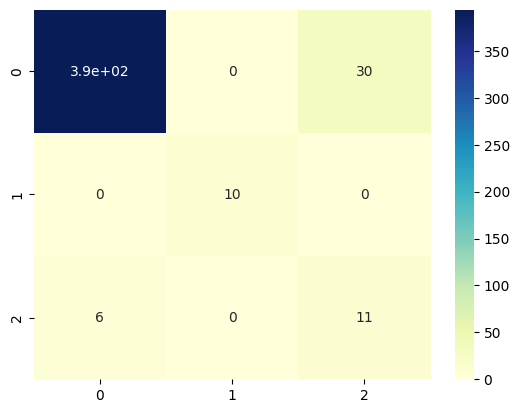

In [337]:
print('RandomForest')
prediction_report('rf' , df_train_RandomUnderSampler)
print('XGBoost')
prediction_report('xgb' , df_train_RandomUnderSampler)
print('CATBoost')
prediction_report('cat' , df_train_RandomUnderSampler)

RandomForest
Classification Report:
               precision    recall  f1-score   support

         0.0       0.98      1.00      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       0.91      0.59      0.71        17

    accuracy                           0.98       451
   macro avg       0.96      0.86      0.90       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.9689048857296801


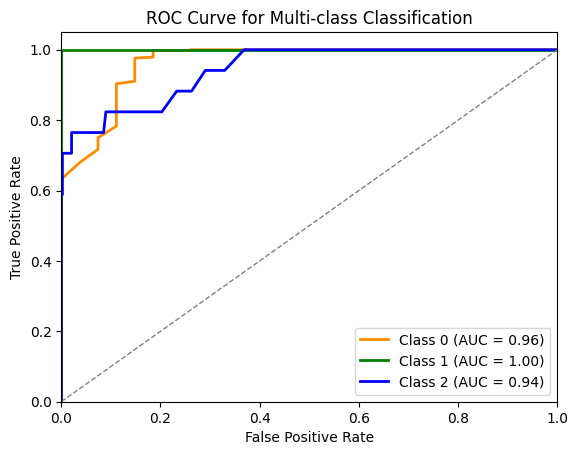

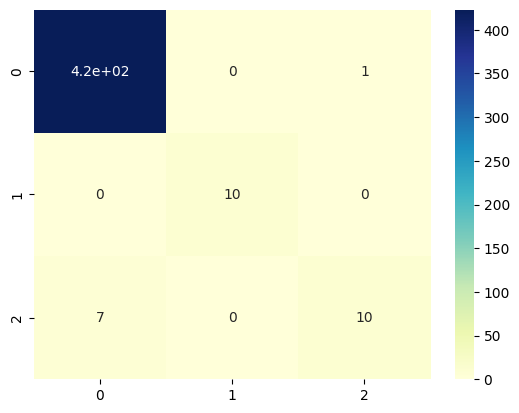

XGBoost
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       0.79      0.65      0.71        17

    accuracy                           0.98       451
   macro avg       0.92      0.88      0.90       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.9689279884537841


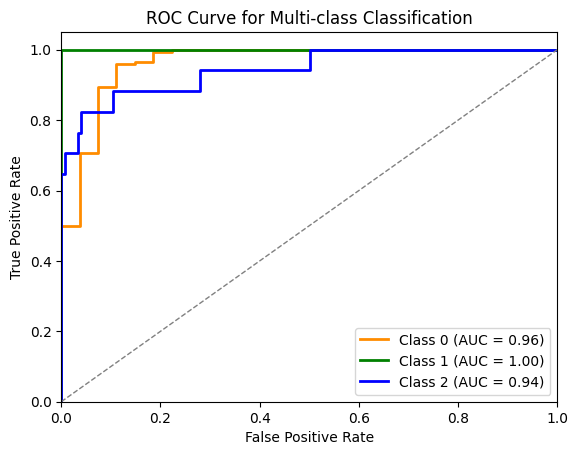

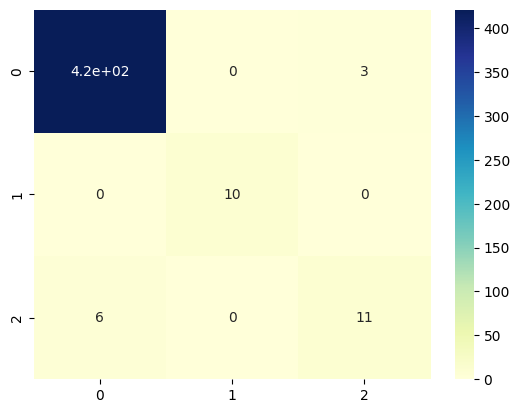

CATBoost
Learning rate set to 0.085857
0:	learn: 0.9754474	total: 3.99ms	remaining: 3.99s
1:	learn: 0.8714583	total: 8.2ms	remaining: 4.09s
2:	learn: 0.7880183	total: 13.9ms	remaining: 4.63s
3:	learn: 0.7152029	total: 17.8ms	remaining: 4.43s
4:	learn: 0.6491163	total: 21.4ms	remaining: 4.25s
5:	learn: 0.5965127	total: 24.9ms	remaining: 4.12s
6:	learn: 0.5530711	total: 28.5ms	remaining: 4.04s
7:	learn: 0.5137287	total: 33ms	remaining: 4.09s
8:	learn: 0.4787985	total: 37.4ms	remaining: 4.11s
9:	learn: 0.4482113	total: 40.9ms	remaining: 4.05s
10:	learn: 0.4195214	total: 44.8ms	remaining: 4.03s
11:	learn: 0.3950170	total: 48.4ms	remaining: 3.99s
12:	learn: 0.3720332	total: 51.8ms	remaining: 3.93s
13:	learn: 0.3519099	total: 55.3ms	remaining: 3.89s
14:	learn: 0.3336018	total: 58.5ms	remaining: 3.84s
15:	learn: 0.3155712	total: 62.2ms	remaining: 3.83s
16:	learn: 0.3002853	total: 65.7ms	remaining: 3.8s
17:	learn: 0.2830453	total: 69.2ms	remaining: 3.77s
18:	learn: 0.2705968	total: 72.4ms	rema

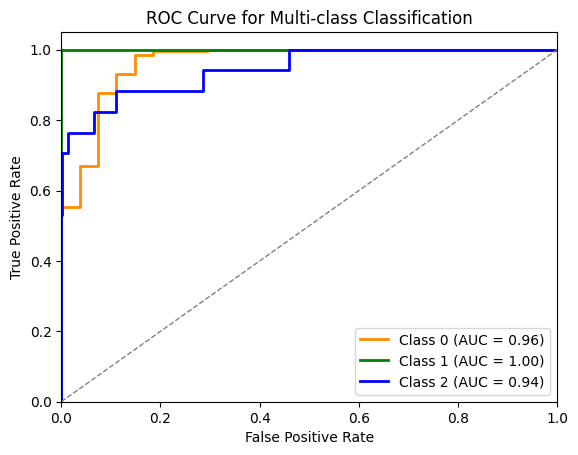

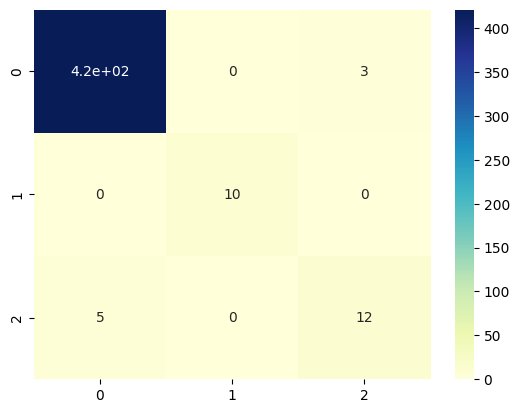

In [338]:
print('RandomForest')
prediction_report('rf' , df_train_RandomOverSampler)
print('XGBoost')
prediction_report('xgb' , df_train_RandomOverSampler)
print('CATBoost')
prediction_report('cat' , df_train_RandomOverSampler)

RandomForest
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.51      0.68       424
         1.0       0.91      1.00      0.95        10
         2.0       0.08      1.00      0.14        17

    accuracy                           0.54       451
   macro avg       0.66      0.84      0.59       451
weighted avg       0.96      0.54      0.66       451

ROC AUC Score: 0.9453202839486599


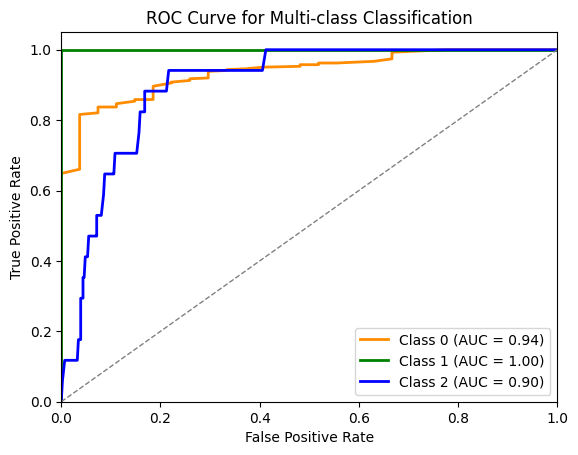

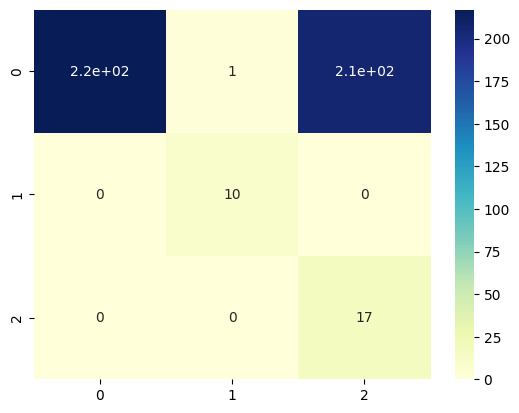

XGBoost
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      0.13      0.24       424
         1.0       1.00      1.00      1.00        10
         2.0       0.04      1.00      0.08        17

    accuracy                           0.19       451
   macro avg       0.68      0.71      0.44       451
weighted avg       0.96      0.19      0.25       451

ROC AUC Score: 0.9371631793313796


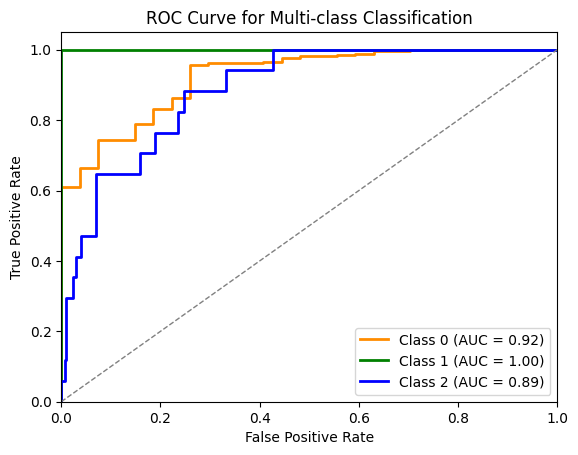

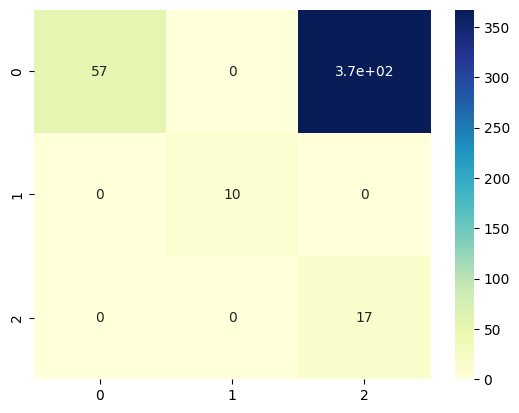

CATBoost
Learning rate set to 0.071603
0:	learn: 1.0514702	total: 1.5ms	remaining: 1.5s
1:	learn: 1.0008137	total: 2.65ms	remaining: 1.32s
2:	learn: 0.9527675	total: 3.81ms	remaining: 1.27s
3:	learn: 0.9120569	total: 4.84ms	remaining: 1.21s
4:	learn: 0.8693721	total: 6.08ms	remaining: 1.21s
5:	learn: 0.8301771	total: 7.88ms	remaining: 1.3s
6:	learn: 0.7976675	total: 9.12ms	remaining: 1.29s
7:	learn: 0.7604896	total: 10.5ms	remaining: 1.3s
8:	learn: 0.7328982	total: 11.7ms	remaining: 1.29s
9:	learn: 0.7118531	total: 12.9ms	remaining: 1.28s
10:	learn: 0.6873374	total: 14ms	remaining: 1.26s
11:	learn: 0.6577108	total: 15.2ms	remaining: 1.25s
12:	learn: 0.6315814	total: 16.3ms	remaining: 1.24s
13:	learn: 0.6044808	total: 17.5ms	remaining: 1.23s
14:	learn: 0.5849415	total: 18.7ms	remaining: 1.23s
15:	learn: 0.5661275	total: 19.9ms	remaining: 1.23s
16:	learn: 0.5482682	total: 21ms	remaining: 1.22s
17:	learn: 0.5301003	total: 22.2ms	remaining: 1.21s
18:	learn: 0.5095126	total: 23.6ms	remainin

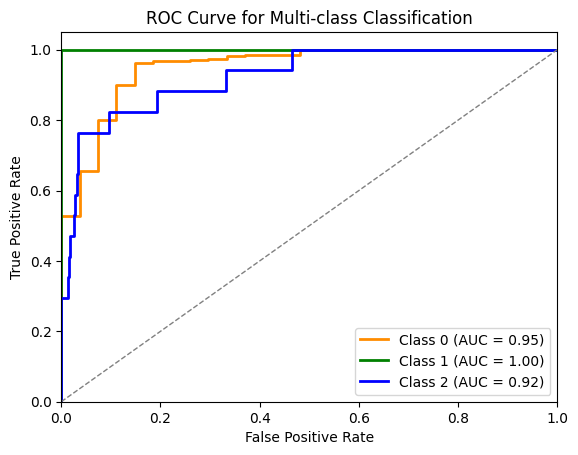

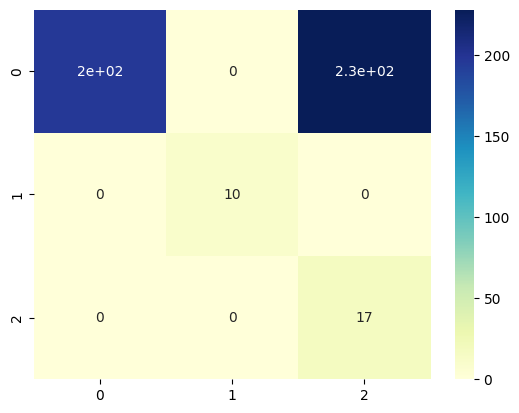

In [339]:
print('RandomForest')
prediction_report('rf' , df_train_ClusterCentroids)
print('XGBoost')
prediction_report('xgb' , df_train_ClusterCentroids)
print('CATBoost')
prediction_report('cat' , df_train_ClusterCentroids)

RandomForest
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       1.00      0.65      0.79        17

    accuracy                           0.99       451
   macro avg       1.00      0.88      0.93       451
weighted avg       0.99      0.99      0.99       451

ROC AUC Score: 0.9706569041358343


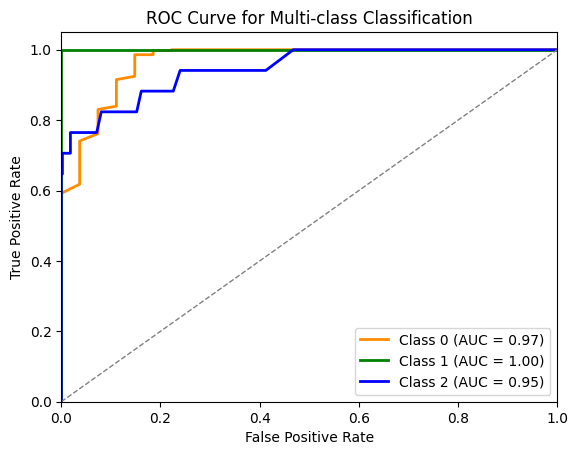

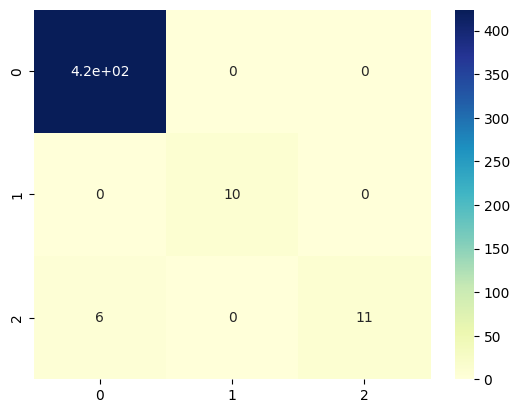

XGBoost
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       0.85      0.65      0.73        17

    accuracy                           0.98       451
   macro avg       0.94      0.88      0.91       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.9688828090917166


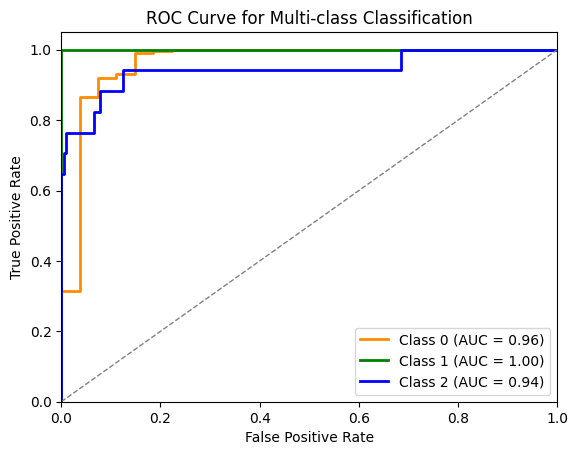

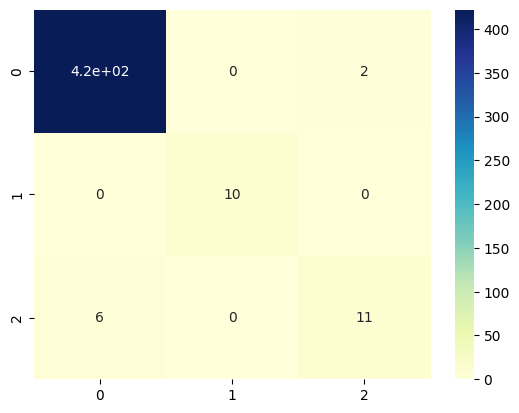

CATBoost
Learning rate set to 0.085857
0:	learn: 0.9718065	total: 6.42ms	remaining: 6.41s
1:	learn: 0.8630897	total: 17.1ms	remaining: 8.55s
2:	learn: 0.7736819	total: 21.9ms	remaining: 7.28s
3:	learn: 0.7064416	total: 27.2ms	remaining: 6.76s
4:	learn: 0.6493007	total: 31.6ms	remaining: 6.29s
5:	learn: 0.5959786	total: 36ms	remaining: 5.97s
6:	learn: 0.5459711	total: 40.9ms	remaining: 5.8s
7:	learn: 0.5075238	total: 45.5ms	remaining: 5.65s
8:	learn: 0.4681034	total: 50.1ms	remaining: 5.51s
9:	learn: 0.4352701	total: 54.4ms	remaining: 5.38s
10:	learn: 0.4042988	total: 59.7ms	remaining: 5.37s
11:	learn: 0.3765260	total: 64.4ms	remaining: 5.3s
12:	learn: 0.3512514	total: 69.1ms	remaining: 5.25s
13:	learn: 0.3289907	total: 73.2ms	remaining: 5.16s
14:	learn: 0.3090257	total: 77.5ms	remaining: 5.08s
15:	learn: 0.2920290	total: 81.9ms	remaining: 5.04s
16:	learn: 0.2748054	total: 85.9ms	remaining: 4.97s
17:	learn: 0.2600009	total: 90.2ms	remaining: 4.92s
18:	learn: 0.2449443	total: 94.6ms	rema

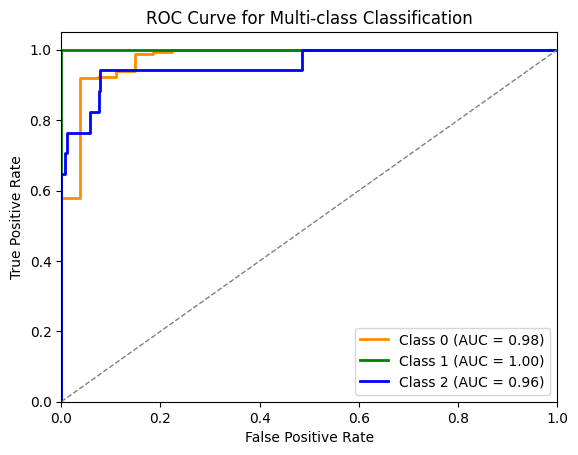

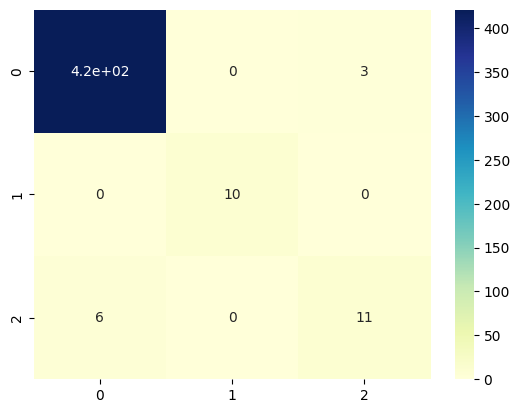

In [340]:
print('RandomForest')
prediction_report('rf' , df_train_SMOTE)
print('XGBoost')
prediction_report('xgb' , df_train_SMOTE)
print('CATBoost')
prediction_report('cat' , df_train_SMOTE)

RandomForest


Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      1.00      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       0.85      0.65      0.73        17

    accuracy                           0.98       451
   macro avg       0.94      0.88      0.91       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.9720580484397271


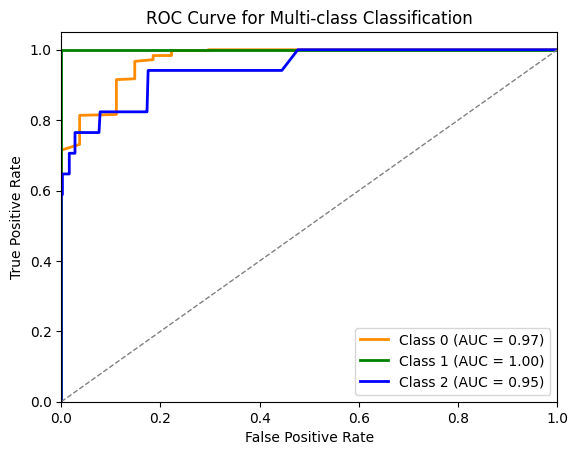

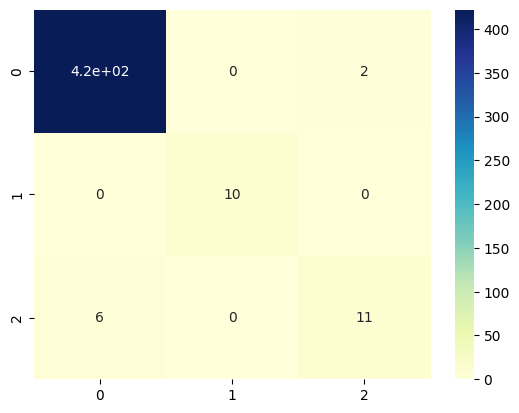

XGBoost
Classification Report:
               precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       424
         1.0       1.00      1.00      1.00        10
         2.0       0.73      0.65      0.69        17

    accuracy                           0.98       451
   macro avg       0.91      0.88      0.89       451
weighted avg       0.98      0.98      0.98       451

ROC AUC Score: 0.967421962360382


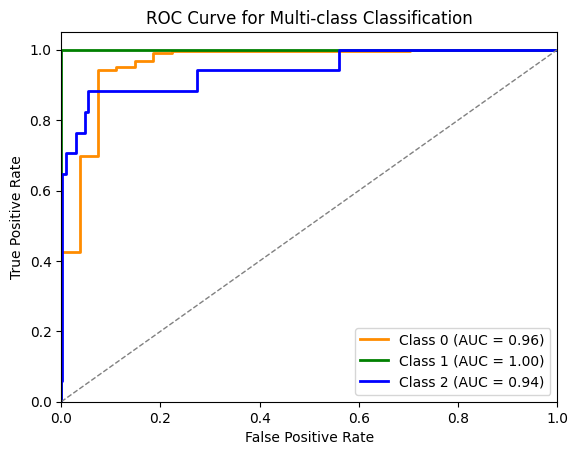

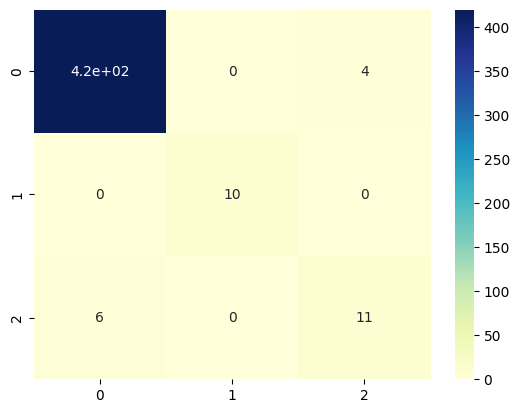

CATBoost
Learning rate set to 0.085761
0:	learn: 0.9637814	total: 6.46ms	remaining: 6.45s
1:	learn: 0.8553730	total: 12.5ms	remaining: 6.24s
2:	learn: 0.7752539	total: 19.9ms	remaining: 6.61s
3:	learn: 0.7008096	total: 24.7ms	remaining: 6.14s
4:	learn: 0.6361357	total: 29.7ms	remaining: 5.91s
5:	learn: 0.5831751	total: 35ms	remaining: 5.81s
6:	learn: 0.5341255	total: 40.3ms	remaining: 5.71s
7:	learn: 0.4930552	total: 45.2ms	remaining: 5.6s
8:	learn: 0.4545619	total: 49.7ms	remaining: 5.48s
9:	learn: 0.4208171	total: 54ms	remaining: 5.34s
10:	learn: 0.3918657	total: 58.3ms	remaining: 5.24s
11:	learn: 0.3642876	total: 62.5ms	remaining: 5.14s
12:	learn: 0.3406677	total: 66.9ms	remaining: 5.08s
13:	learn: 0.3173900	total: 72.1ms	remaining: 5.08s
14:	learn: 0.2989084	total: 76.4ms	remaining: 5.02s
15:	learn: 0.2811300	total: 80.9ms	remaining: 4.98s
16:	learn: 0.2648788	total: 86ms	remaining: 4.97s
17:	learn: 0.2496780	total: 90.1ms	remaining: 4.92s
18:	learn: 0.2343323	total: 94.4ms	remaini

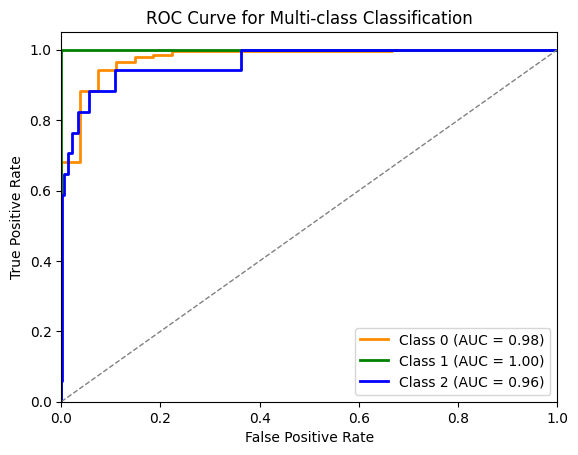

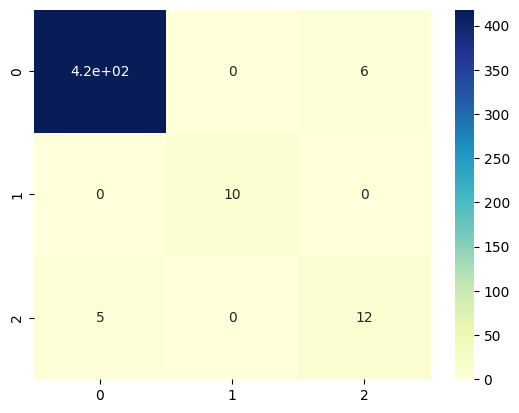

In [341]:
print('RandomForest')
prediction_report('rf' , df_train_SMOTEENN)
print('XGBoost')
prediction_report('xgb' , df_train_SMOTEENN)
print('CATBoost')
prediction_report('cat' , df_train_SMOTEENN)

In [342]:
df_train_SMOTE.to_csv('DatasetTrain.csv' , index = False)

In [343]:
df_test.to_csv('DatasetTest.csv' , index = False)

In [345]:
validation = pd.concat([X_test,y_test] , axis=1)
validation.to_csv('DatasetValidation.csv' , index = False)